<a href="https://colab.research.google.com/github/DangKhoa8422/Pre-Trained-Models/blob/main/Cont1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install youtube_search

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


10/10 [==============================] - 1s 40ms/step


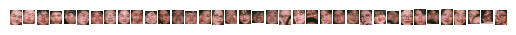

In [ ]:
import matplotlib.pyplot as plt
from mtcnn import MTCNN
def draw_faces(filename, result_list):
    data = plt.imread(filename)
    for i in range(len(result_list)):
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        plt.imshow(data[y1:y2, x1:x2])
    plt.show()

filename = '/content/sample_data/clb1.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename, faces)

In [ ]:
#ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/sample_data/conbao.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]
result  = np.argmax(preds,axis=1)
print(result[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02099267', 'flat-coated_retriever', 0.267152), ('n02105056', 'groenendael', 0.07573942), ('n02109047', 'Great_Dane', 0.06685647)]
205


In [ ]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/sample_data/conbao.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print(features)

1/1 [==============================] - 1s 730ms/step
[[[[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     7.033144 ]
   [ 0.         0.         5.025235  ...  0.         0.
     8.689738 ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   ...
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     1.32

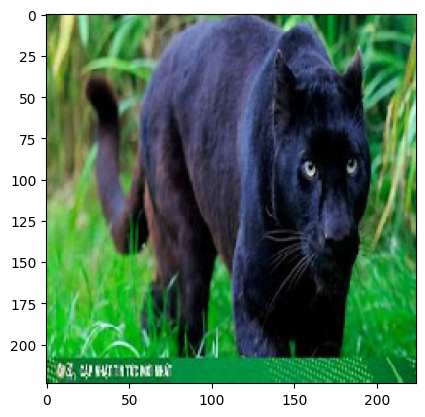

1/1 [==============================] - 1s 750ms/step
[[[[0.00000000e+00 2.65518570e+01 0.00000000e+00 ... 0.00000000e+00
    1.16726637e+01 1.26184296e+02]
   [0.00000000e+00 0.00000000e+00 1.03748572e+00 ... 0.00000000e+00
    0.00000000e+00 2.48643753e+02]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    1.89289093e+02 2.84687500e+02]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 2.21394440e+02 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]]

  [[0.00000000e+00 2.65208893e+02 0.00000000e+00 ... 1.91359825e+01
    0.00000000e+00 1.44834976e+02]
   [0.00000000e+00 1.09294228e+02 0.00000000e+00 ... 6.47178467e+02
    9.87986603e+01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    0.00000000e+00 0.00000000e+00]
   ...
   [

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/sample_data/conbao.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
plt.imshow(img)
plt.show()

block4_pool_features = model.predict(x)
print(block4_pool_features)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(200, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
model.fit(...)

# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy')

# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
model.fit(...)

In [ ]:
from youtube_search import YoutubeSearch
import webbrowser
mysong = input('Nhap ten bai hat: ')
result = YoutubeSearch(mysong, max_results=10).to_dict()
print(result)
print(result[0]['url_suffix'])
url='http://www.youtube.com'+result[0]['url_suffix']
print(url)
webbrowser.open(url)
print('Bai hat yeu thich cua ban da duoc mo')
 

Nhap ten bai hat: Hello
[{'id': 'YQHsXMglC9A', 'thumbnails': ['https://i.ytimg.com/vi/YQHsXMglC9A/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLAHnhWEMlSYbwVzv7HE1YaH8_8RrQ', 'https://i.ytimg.com/vi/YQHsXMglC9A/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLCdLcY7Ni9L3AP5ZQ7RDGNaIo6H3g'], 'title': 'Adele - Hello (Official Music Video)', 'long_desc': None, 'channel': 'Adele', 'duration': '6:07', 'views': '3,063,465,465 views', 'publish_time': '7 years ago', 'url_suffix': '/watch?v=YQHsXMglC9A&pp=ygUFSGVsbG8%3D'}, {'id': 'fazMSCZg-mw', 'thumbnails': ['https://i.ytimg.com/vi/fazMSCZg-mw/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLD83G1Qgoz32DrPPGsqcpin1Y_w7A', 'https://i.ytimg.com/vi/fazMSCZg-mw/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLB-67_1uw3KPkOv_e_9a3Y-mhekgQ'], 'title': 'Pop Smoke - Hello (Audio) ft. A Boogie wit da Hoodie', 'long_desc': None, 'channel': 'POP SMOKE', 'durati

In [ ]:
from youtube_search import YoutubeSearch
import webbrowser
from openpyxl import Workbook
data = Workbook()
sheet = data.active
mysong = input('Nhap bai hat: ')
print(mysong)
result = YoutubeSearch(mysong, max_results=10).to_dict()
print(result)
for i in range(10):
  print(result[i]['title'])
  print(result[i]['url_suffix'])
  url = 'http://www.youtube.com'+result[i]['url_suffix']
  print(url)
  sheet['A' + str(i+1)] = i + 1
  sheet['B' + str(i+1)] = result[i]['title']
  sheet['C' + str(i+1)] = result[i]['url_suffix']
  sheet['D' + str(i+1)] = result[i]['views']

Nhap bai hat: payphone
payphone
[{'id': 'fuP4Lkt1vAo', 'thumbnails': ['https://i.ytimg.com/vi/fuP4Lkt1vAo/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLC4PgqKUuitf45JRbYJZUIVLPxzXQ', 'https://i.ytimg.com/vi/fuP4Lkt1vAo/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLANWLuuqtRnEhSgFr80jiGwIzsCaQ'], 'title': 'Maroon 5 Ft. Wiz Khalifa - Payphone (Lyrics)', 'long_desc': None, 'channel': 'Taj Tracks', 'duration': '3:53', 'views': '2,232,947 views', 'publish_time': '1 year ago', 'url_suffix': '/watch?v=fuP4Lkt1vAo&pp=ygUIcGF5cGhvbmU%3D'}, {'id': 'KRaWnd3LJfs', 'thumbnails': ['https://i.ytimg.com/vi/KRaWnd3LJfs/hq720.jpg?sqp=-oaymwEjCOgCEMoBSFryq4qpAxUIARUAAAAAGAElAADIQj0AgKJDeAE=&rs=AOn4CLBPy3MP5giHD2HK81p0CPmNJCmJuQ', 'https://i.ytimg.com/vi/KRaWnd3LJfs/hq720.jpg?sqp=-oaymwEXCNAFEJQDSFryq4qpAwkIARUAAIhCGAE=&rs=AOn4CLBUZlf2X0m1ZsGQMStt3xmMQ3CphA'], 'title': 'Maroon 5 - Payphone ft. Wiz Khalifa (Explicit) (Official Music Video)', 'long_desc': 